<a href="https://colab.research.google.com/github/iraidaantropova/final_project/blob/main/Final_Project_data_analysis_SinitsaI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#использую датасет "Набор данных для прогнозирования сердечной недостаточности"
#https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

#импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Описание набора данных:

Age : возраст пациента в годах;

Anaemia : болеет ли пациент анемией;

Сreatinine_phosphokinase: уровень фермента в креатининфосфокиназа [ед/литр];

Diabetes : есть ли у пациента заболевание диабет;

Ejection_fraction : фракция выброса крови [%];

High_blood_pressure : страдает ли повышенным давлением пациент [да/нет];

Platelets	: уровень тромбоцитов  [тыс/мкл];

Serum_creatinine : уровень сывороточного креатинина [мкмоль/л];

Serum_sodium : уровень натрия в сыворотка [Ммоль/л ];

Sex	: пол пациента;

Smoking	 : курение [да /нет];

Time : период наблюдения ;

DEATH_EVENT : наступила ли смерть за период наблюдения за пациентом.


In [ ]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Датасет состоит из 13 столбцов, в нем нет недостающих или ложных данных, чтобы начать исследование датасета меняю двоичные значения в категориальных функциях на их метки

In [ ]:
df['sex'] = df['sex'].apply(lambda x: 'Female' if x==0 else 'Male')
df['smoking'] = df['smoking'].apply(lambda x: 'No' if x==0 else 'Yes')
df['diabetes'] = df['diabetes'].apply(lambda x: 'No' if x==0 else 'Yes')
df['anaemia'] = df['anaemia'].apply(lambda x: 'No' if x==0 else 'Yes')
df['high_blood_pressure'] = df['high_blood_pressure'].apply(lambda x: 'No' if x==0 else 'Yes')
df['DEATH_EVENT'] = df['DEATH_EVENT'].apply(lambda x: 'No' if x==0 else 'Yes')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [ ]:
#числовые признаки
num_cols=df.select_dtypes(include=np.number).columns.tolist()
# категориальные признаки
cat_cols=df.select_dtypes(object).columns.tolist()
print(f'Числовых признаков в датасете содержится  {len(num_cols)}, а именно:\n{num_cols}\n'
     f'\nКатегориальных признаков содержится {len(cat_cols)}, а именно:\n{cat_cols}')

Числовых признаков в датасете содержится  7, а именно:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Категориальных признаков содержится 6, а именно:
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


In [ ]:
df.describe()
df.describe().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,581.84,38.08,263358.03,1.39,136.63,130.26
std,11.89,970.29,11.83,97804.24,1.03,4.41,77.61
min,40.00,23.00,14.00,25100.00,0.50,113.00,4.00
25%,51.00,116.50,30.00,212500.00,0.90,134.00,73.00
50%,60.00,250.00,38.00,262000.00,1.10,137.00,115.00
75%,70.00,582.00,45.00,303500.00,1.40,140.00,203.00
max,95.00,7861.00,80.00,850000.00,9.40,148.00,285.00


Делаю вывод,  что средний возраст пациентов составляет 60 л, время наблюдения от 4 до 285 дней, в среднем 130 дней.

Тромбоциты (кровяные пластинки) — элементы крови, которые отвечают за свёртывание. Они помогают остановить кровотечение и защищают от массивной кровопотери. У здорового человека их количество варьируется от 150 000 до 400 000 кило тромбоцитов / мл крови, в датасете у 75% пациентов находится в данном диапазоне

Натрий в сыворотке: уровень натрия в сыворотке крови в норме должен составлять от 135 до 145 ммоль/л. Все, что ниже — гипонатриемия , выше — гипернатриемия (типична для людей с сердечной недостаточностью).
При избытке натрия человек испытывает сильную жажду — организм стремится восполнить нехватку воды и «разбавить» чрезмерно концентрированный раствор. В тяжелых случаях возможны неврологические симптомы, выражающиеся в спутанности сознания, появление судорог, больной может впасть в кому. В данном датасете среднее значение выше нормы

Креатининфосфокиназа: это фермент, который присутствует в крови и помогает восстанавливать поврежденные ткани. Высокий уровень КФК означает сердечную недостаточность или травму. Нормальный уровень у мужчин составляет 55–170 мкг / л, а у женщин - 30–135 мкг / л. В представленном наборе данных, поскольку у всех пациентов была сердечная недостаточность, среднее значение (581.84) выше нормы.


In [ ]:
#В ходе исследования, можно наглядно представить, в каком отношении идет разделение внутри категориальных признаков:
#мужчины/женщины

sex_count=df["sex"].value_counts()
sex_count

Male      194
Female    105
Name: sex, dtype: int64

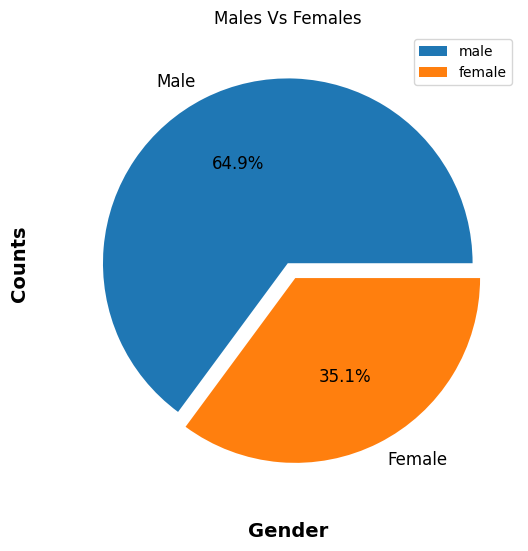

In [ ]:
plt.figure(figsize = (20, 6))

explode = (0, 0.09)

sex_count.plot(kind = 'pie', fontsize = 12,style='_classic_test_patch', explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['male','female'], loc = "best")
plt.show()

In [ ]:
#количество курящих людей
smoke_count=df['smoking'].value_counts()
smoke_count

No     203
Yes     96
Name: smoking, dtype: int64

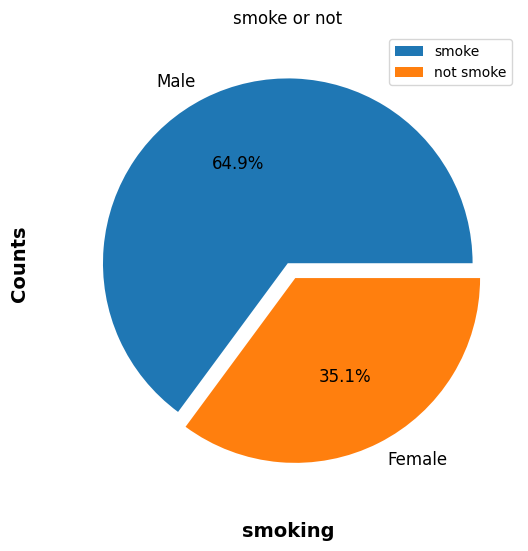

In [ ]:
plt.figure(figsize = (20, 6))

explode = (0, 0.09)

sex_count.plot(kind = 'pie', fontsize = 12,style='_classic_test_patch', explode = explode, autopct = '%.1f%%')
plt.title('smoke or not')
plt.xlabel('smoking', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['smoke','not smoke'], loc = "best")
plt.show()

In [ ]:
#количество людей в исследуемом датасете, которые болеют диабетом
diabetes_count=df['diabetes'].value_counts()
diabetes_count

No     174
Yes    125
Name: diabetes, dtype: int64

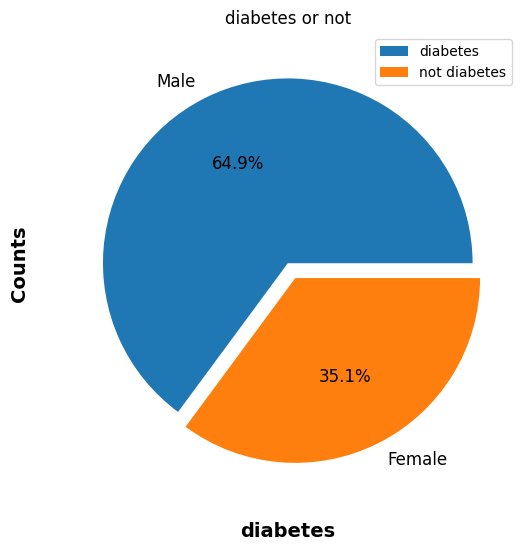

In [ ]:
plt.figure(figsize = (20, 6))

explode = (0, 0.09)

sex_count.plot(kind = 'pie', fontsize = 12,style='_classic_test_patch', explode = explode, autopct = '%.1f%%')
plt.title('diabetes or not')
plt.xlabel('diabetes', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['diabetes','not diabetes'], loc = "best")
plt.show()

In [ ]:
#количество людей в анамнезе которых анемия
anaemia_count=df['anaemia'].value_counts()
anaemia_count

No     170
Yes    129
Name: anaemia, dtype: int64

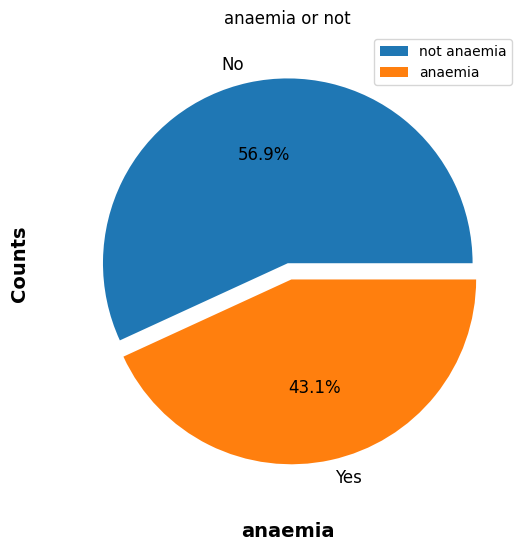

In [ ]:
plt.figure(figsize = (20, 6))

explode = (0, 0.09)

anaemia_count.plot(kind = 'pie', fontsize = 12,style='_classic_test_patch', explode = explode, autopct = '%.1f%%')
plt.title('anaemia or not')
plt.xlabel('anaemia', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['not anaemia','anaemia'], loc = "best")
plt.show()

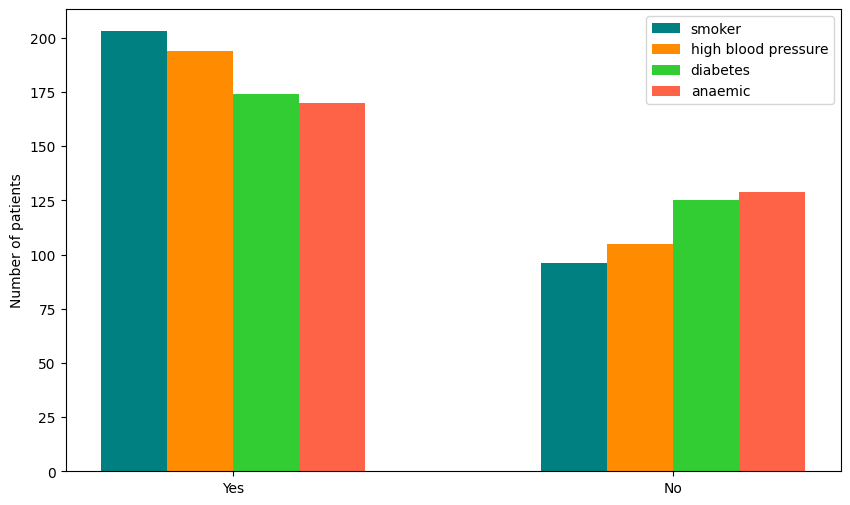

In [ ]:
#также можно сделать сводную статистику по категориальным признакам:

fig = plt.subplots(figsize=[10,6])
bar1 = df.smoking.value_counts().values
bar2 = df.high_blood_pressure.value_counts().values
bar3 = df.diabetes.value_counts().values
bar4 = df.anaemia.value_counts().values
ticks = np.arange(0,3, 2)
width = 0.3
plt.bar(ticks, bar1, width=width, color='teal', label='smoker')
plt.bar(ticks+width, bar2, width=width, color='darkorange', label='high blood pressure')
plt.bar(ticks+2*width, bar3, width=width, color='limegreen', label='diabetes')
plt.bar(ticks+3*width, bar4, width=width, color='tomato', label='anaemic')
plt.xticks(ticks+1.5*width, ['Yes', 'No'])
plt.ylabel('Number of patients')
plt.legend()

In [ ]:
import seaborn as sns

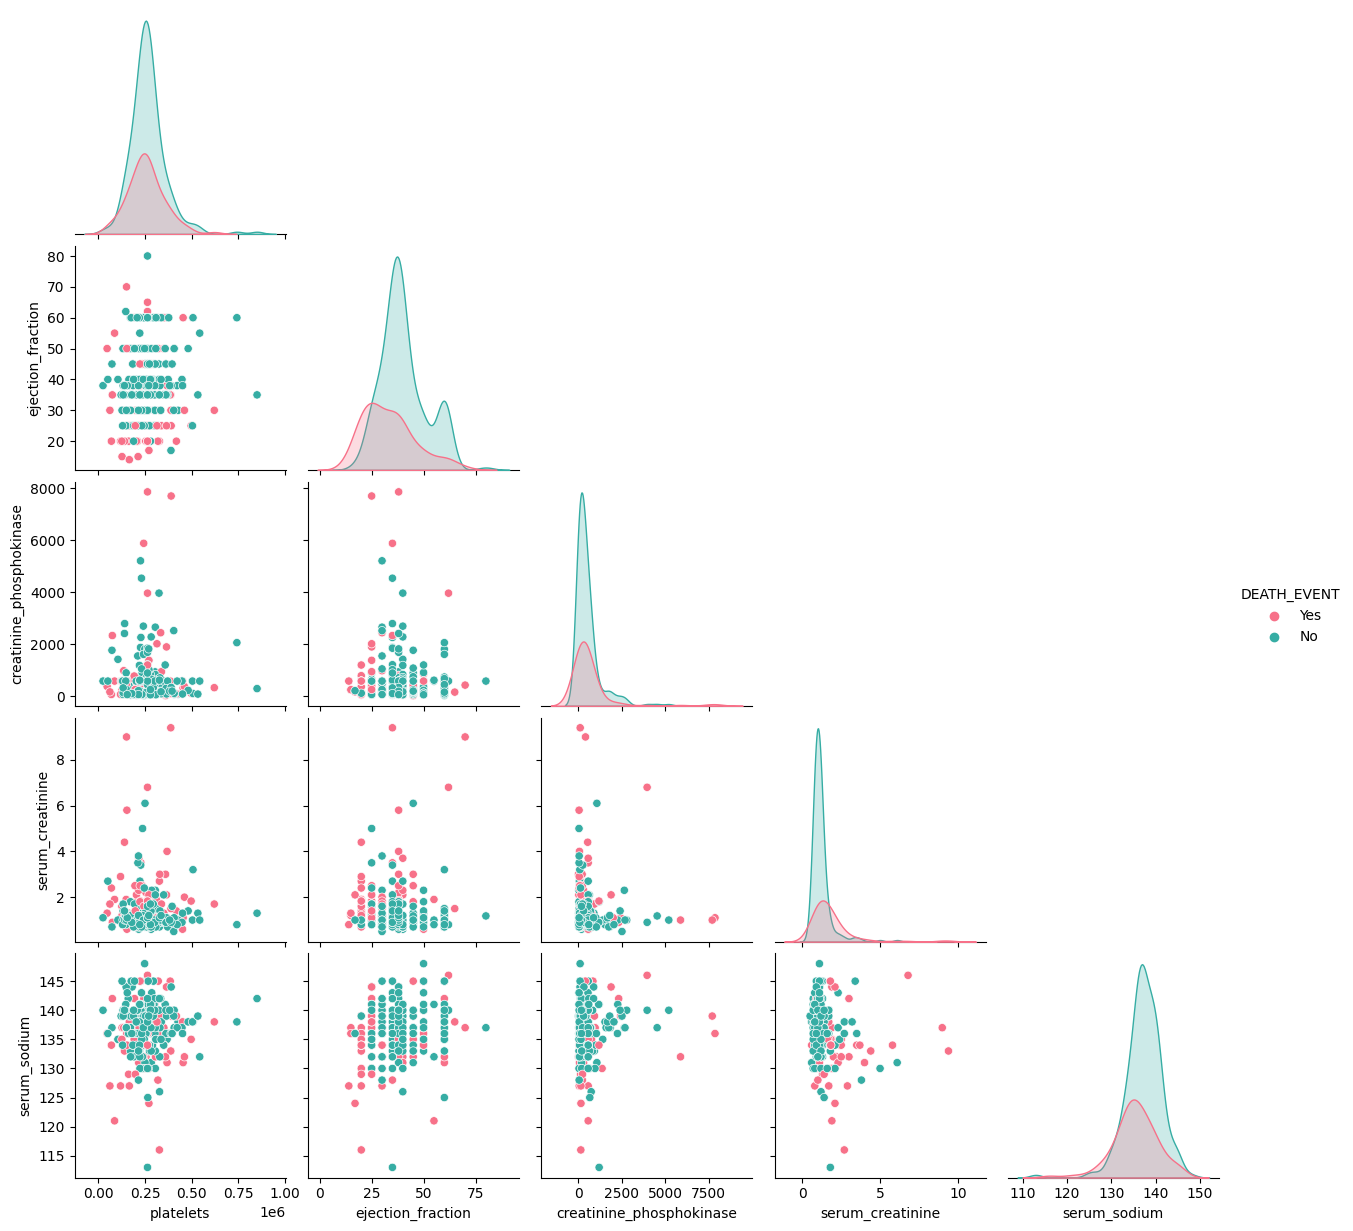

In [ ]:
#исследование взаимосвязи между числовыми параметрами

sns.pairplot(df[['platelets', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']],
             hue='DEATH_EVENT', palette='husl', corner=True)

Можно заметить несколько особенностей:

у многих пациентов, умерших от сердечной недостаточности, фракция выброса ниже, чем у выживших. Они также имеют немного более высокие уровни креатинина сыворотки и креатинфосфокиназы.
Между функциями нет очевидно сильной корреляции, ниже я это проверяю, рассчитав коэффициент корреляции Спирмена R. Данный коэффициент корреляции может принимать значения от минус единицы до единицы, причем при R=1 имеет место строго прямая связь, а при R= -1 – строго обратная связь.
Если коэффициент корреляции отрицательный, то имеет место обратная связь, если положительный, то – прямая связь.
Если коэффициент корреляции равен нулю, то связь между величинами практически отсутствует.
Чем ближе модуль коэффициента корреляции к единице, тем более сильной является связь между измеряемыми величинами.

In [ ]:
df[['platelets', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium']].corr(method='spearman')

,platelets,ejection_fraction,creatinine_phosphokinase,serum_creatinine,serum_sodium
platelets,1.000000,0.053696,0.060033,-0.051028,0.049453
ejection_fraction,0.053696,1.000000,-0.067839,-0.177986,0.161695
creatinine_phosphokinase,0.060033,-0.067839,1.000000,-0.049936,0.016886
serum_creatinine,-0.051028,-0.177986,-0.049936,1.000000,-0.300413
serum_sodium,0.049453,0.161695,0.016886,-0.300413,1.000000


Между параметрами нет сильной корреляции, можно заметить положительную взаимосвзяь у креатинина сыворотки и содержанием натрия в сыворотке,
в медицинской литературе указано, что с возрастом содержание креатинина в сыворотке увеличивается , это и  объясняет их слегка положительную взаимосвязь.

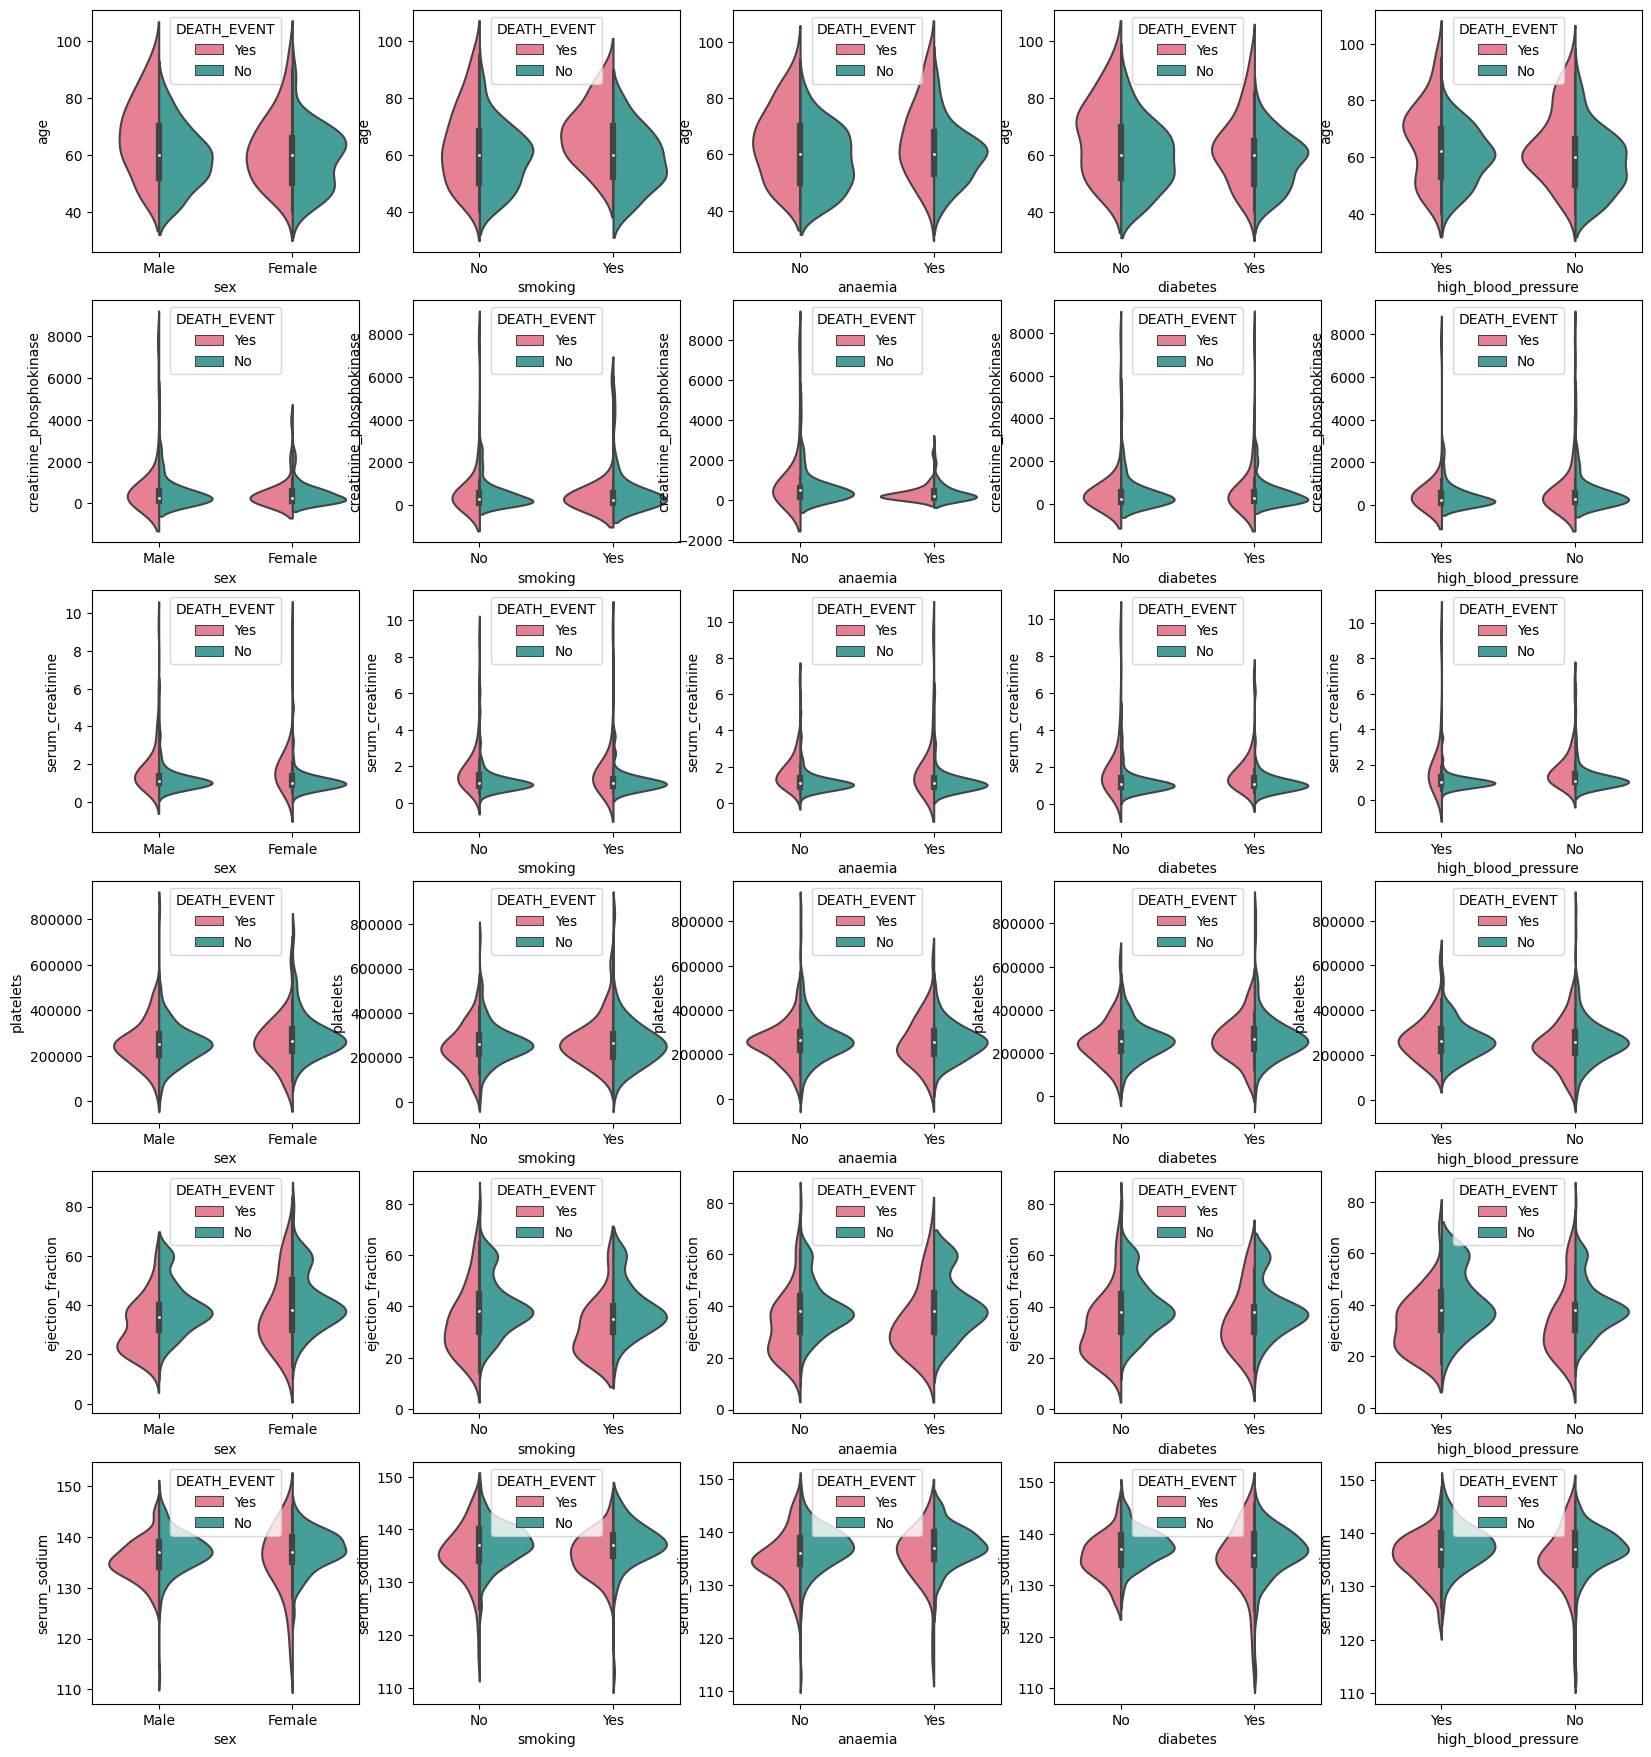

In [ ]:
#исследование взаимосвязи между всеми параметрами

fig,ax = plt.subplots(6, 5, figsize=[20,22])
cat_features = ['sex','smoking','anaemia', 'diabetes', 'high_blood_pressure']
num_features = ['age', 'creatinine_phosphokinase', 'serum_creatinine', 'platelets', 'ejection_fraction', 'serum_sodium']
for i in range(0,6):
    for j in range(0,5):
        sns.violinplot(data=df, x=cat_features[j],y=num_features[i], hue='DEATH_EVENT', split=True, palette='husl',facet_kws={'despine':False}, ax=ax[i,j])
        ax[i,j].legend(title='DEATH_EVENT', loc='upper center')

Анемия: у людей с таким диагнозом более низкий уровень фермента креатининфосфокиназы и более высокий уровень сывороточного креатинина,   чем у пациентов без анемии.
Среди пациентов с анемией фракция выброса у умерших ниже, чем у выживших.

Диабет: у пациентов с диабетом более низкий уровень натрия, и, опять же, фракция выброса у умерших ниже, чем у выживших.

Пол: у умерших пациентов фракция выброса у мужчин ниже, чем у женщин. Также уровень фермента креатининфосфокиназы выше у мужчин, чем у женщин.

Курение: у умерших пациентов, которые курили,  фракция выброса была несколько ниже, чем у умерших некурящих. Уровни фермента креатининфосфокиназы выше у выживших курильщиков, чем у выживших некурящих.